# What is a salary distribution for data roles?

## Methodology
1. Load and clean-up data.
2. Filter for job of my interest
3. Plot data

# 1. Load and clean-up data

In [40]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Skills from str to list

In [41]:
df = df[df['salary_year_avg'].notna()]

# 2. Filter job of my interest

In [53]:
# List of jobs of my interest including senior roles
job_list=['Data Analyst', 'Business Analyst', 'Data Scientist','Senior Data Analyst', 'Senior Business Analyst', 'Senior Data Scientist']

In [84]:
# Filter data
df_plot = df[df['job_title_short'].isin(job_list)].copy()

# 3. Plot Data

In [86]:
# Sort for median salary
job_order = (df_plot.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index)

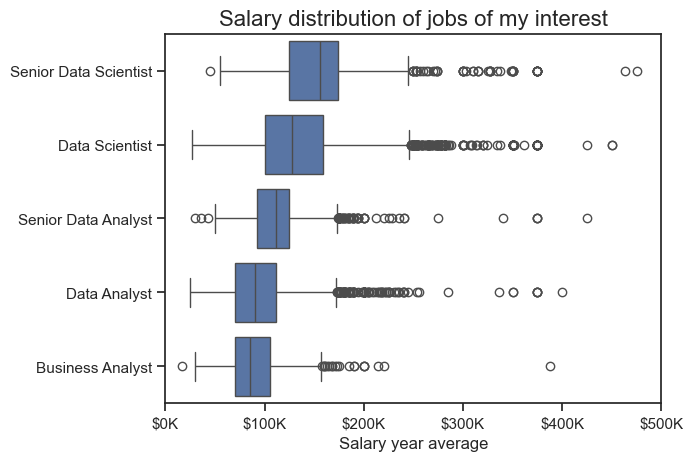

In [ ]:
# Plot data
sns.boxplot(data=df_plot, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

#Format axes
ax = plt.gca()
ax.set_xlim(0,500000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

#Add labels
plt.title('Salary distribution of jobs of my interest', fontsize=16)
plt.xlabel('Salary year average')
plt.ylabel('')
plt.show()